In [1]:
import pandas as pd
import gzip
import json

import numpy as np 
import matplotlib.pyplot as plt

import spacy
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

from live_plot import LivePlot

In [2]:
device = 'cuda'

In [4]:
df = pd.read_csv('./../sampled_df.csv')

In [21]:
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [22]:
input_size = 300
output_size = 1

In [23]:
class SentimentBinaryClass(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    
    self.linear_relu_sigmoid = nn.Sequential(
      nn.Linear(input_size, 2048),
      nn.ReLU(),
      nn.Linear(2048, 4096),
      nn.ReLU(),
      nn.Linear(4096, output_size),
      nn.Sigmoid()
    )


  def forward(self, x):
    return self.linear_relu_sigmoid(x)


In [24]:
model = SentimentBinaryClass(input_size, output_size).to(device)

In [25]:
cost_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.02)

cost_histroty = []
cost_test_history = []


In [26]:
plt.close()
%matplotlib qt
live_plot = LivePlot()

In [47]:
for epoch in range(50):
  print(f'Epoch {epoch}')
  optimizer.zero_grad()
  outputs = model(X_train)
  cost = cost_fn(outputs, y_train)
  cost.backward()
  optimizer.step()


  test_outputs = model(X_test)
  cost_test = cost_fn(test_outputs, y_test)

  live_plot.update(cost_histroty, cost_test_history)

  cost_test_history.append(cost_test.item())
  cost_histroty.append(cost.item())

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


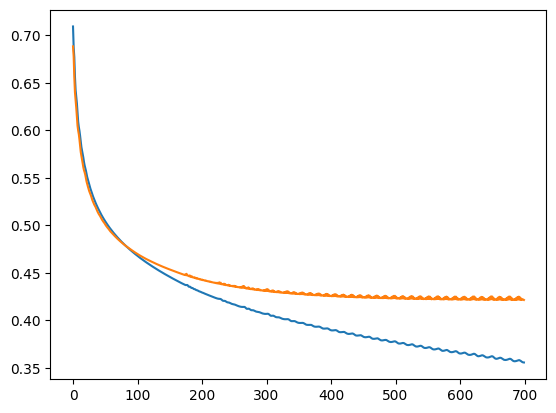

In [134]:
plt.close()
%matplotlib inline

plt.plot(cost_histroty)
plt.plot(cost_test_history)

In [ ]:
# torch.save(model.state_dict(), './models/best_model_linear_arch1.pt')

In [48]:
with torch.no_grad():
  test_outputs = model(X_test)
  cost = cost_fn(test_outputs, y_test)
  labels = torch.tensor([round(val.item()) for val in test_outputs]).reshape(-1, 1).to(device)
  accuracy = (labels == y_test).sum().item() / y_test.size(0)
  print(f'Testing Accuracy: {accuracy}. Cost: {cost}')

Testing Accuracy: 0.89. Cost: 0.2777206003665924


In [49]:
with torch.no_grad():
  train_outputs = model(X_train)
  cost = cost_fn(train_outputs, y_train)
  labels = torch.tensor([round(val.item()) for val in train_outputs]).reshape(-1, 1).to(device)
  accuracy = (labels == y_train).sum().item() / y_train.size(0)
  print(f'Training Accuracy: {accuracy}. Cost: {cost}')

Training Accuracy: 0.898625. Cost: 0.25645071268081665


In [129]:
with torch.no_grad():
  test_outputs = model(X_test)
  cost = cost_fn(test_outputs, y_test)
  labels = torch.tensor([round(val.item()) for val in test_outputs]).reshape(-1, 1).to(device)
  accuracy = (labels == y_test).sum().item() / y_test.size(0)
  print(f'Testing Accuracy: {accuracy}. Cost: {cost}')

Testing Accuracy: 0.814. Cost: 0.42157837748527527


In [119]:
with torch.no_grad():
  test_outputs = model(X_test)
  cost = cost_fn(test_outputs, y_test)
  labels = torch.tensor([round(val.item()) for val in test_outputs]).reshape(-1, 1).to(device)
  accuracy = (labels == y_test).sum().item() / y_test.size(0)
  print(f'Testing Accuracy: {accuracy}. Cost: {cost}')

Testing Accuracy: 0.8015. Cost: 0.4482082724571228


In [105]:
with torch.no_grad():
  test_outputs = model(X_test)
  cost = cost_fn(test_outputs, y_test)
  labels = torch.tensor([round(val.item()) for val in test_outputs]).reshape(-1, 1).to(device)
  accuracy = (labels == y_test).sum().item() / y_test.size(0)
  print(f'Testing Accuracy: {accuracy}. Cost: {cost}')

Testing Accuracy: 0.811. Cost: 0.42899155616760254


In [99]:
with torch.no_grad():
  test_outputs = model(X_test)
  cost = cost_fn(test_outputs, y_test)
  labels = torch.tensor([round(val.item()) for val in test_outputs]).reshape(-1, 1).to(device)
  accuracy = (labels == y_test).sum().item() / y_test.size(0)
  print(f'Testing Accuracy: {accuracy}. Cost: {cost}')

Testing Accuracy: 0.796. Cost: 0.45732900500297546
